# アヤメのデータ分析

## 【問題1】データの取得　

In [1]:
from sklearn.datasets import load_iris 

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.shape

(150, 4)

In [5]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [7]:
iris.target.shape

(150,)

In [8]:
y = pd.DataFrame(iris.target)
y = y.rename(columns={0 : 'Species'})
print(y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


## 【問題2】データの結合

In [9]:
df = X.join(y) # インデックスをキーとして結合

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。


In [11]:
df.head(4) # 先頭4列を抽出

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [12]:
df.dtypes # 型を表示

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object

In [13]:
df.sum() # 合計を表示

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
Species              150.0
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [17]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [18]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [19]:
df['sepal length (cm)'].value_counts() # シリーズとして取得

5.0    10
6.3     9
5.1     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
6.2     4
5.2     4
7.7     4
6.9     4
4.6     4
7.2     3
5.9     3
4.4     3
6.8     3
6.6     2
4.7     2
7.1     1
7.4     1
7.6     1
7.9     1
4.5     1
7.0     1
5.3     1
7.3     1
4.3     1
Name: sepal length (cm), dtype: int64

## 【問題4】irisデータセット自体の調査

iris_dataとは世界的に有名なデータセット
日本で言うアヤメ科の３種類の花を萼片(花弁の支え)の長さ、萼片の幅、花びらの長さ、花弁の幅の4つの特徴変数と共に分類しているデータセット
scikit-learnには7つのトイ・データセットと実世界データセットがあり、アルコリズムを確かめるのに利用される。

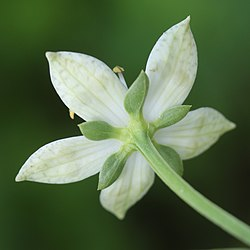

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

sepal_widthの列を３つの異なる方法で抽出する  
50番目から99番目までのデータを抽出する  
petal_lengthの列の50番目から99番目までのデータを抽出する  
petal_widthの値が0.2のデータを抽出する  

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

### 列抽出

In [20]:
df['sepal width (cm)'] # 列指定　

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [21]:
df.loc[:,'sepal width (cm)'] # ラベル名の指定

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [22]:
df.iloc[:, 1] # 添字での指定

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

### 行抽出

In [23]:
df[50:100] # 行はスライスで抽出

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [24]:
df.iloc[50:55] # ilocも使用可能

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [25]:
df.loc[50] # locの場合列毎の情報を表示

sepal length (cm)    7.0
sepal width (cm)     3.2
petal length (cm)    4.7
petal width (cm)     1.4
Species              1.0
Name: 50, dtype: float64

In [26]:
df.query('50 <= index <= 55') # queryを用いる

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1


###  列と行の指定

In [27]:
df.loc[50:100,'sepal width (cm)'] #loc

50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
55     2.8
56     3.3
57     2.4
58     2.9
59     2.7
60     2.0
61     3.0
62     2.2
63     2.9
64     2.9
65     3.1
66     3.0
67     2.7
68     2.2
69     2.5
70     3.2
71     2.8
72     2.5
73     2.8
74     2.9
75     3.0
76     2.8
77     3.0
78     2.9
79     2.6
80     2.4
81     2.4
82     2.7
83     2.7
84     3.0
85     3.4
86     3.1
87     2.3
88     3.0
89     2.5
90     2.6
91     3.0
92     2.6
93     2.3
94     2.7
95     3.0
96     2.9
97     2.9
98     2.5
99     2.8
100    3.3
Name: sepal width (cm), dtype: float64

In [28]:
df.iloc[50:55, 1] #iloc

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
Name: sepal width (cm), dtype: float64

### 値で抽出

In [29]:
df.query('`petal width (cm)` == 0.2').head() # queryは割と素直に描ける　列名にスペースがある場合``で括る

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df.loc[df['petal width (cm)'] == 0.2].head() # locで書く場合　行番号を取得して表示

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df['petal width (cm)'] == 0.2

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal width (cm), Length: 150, dtype: bool

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [33]:
label_0 = len(df.query('Species == 0'))
label_1 = len(df.query('Species == 1'))
label_2 = len(df.query('Species == 2'))
label_counter = np.array([label_0, label_1, label_2]) # ラベルごとのサンプル数
species_name = np.array(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

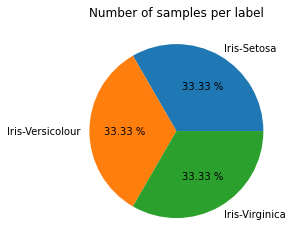

In [34]:
plt.title('Number of samples per label')
plt.pie(label_counter, labels=species_name, autopct='%1.2f %%'); # 少数第二位まで表示

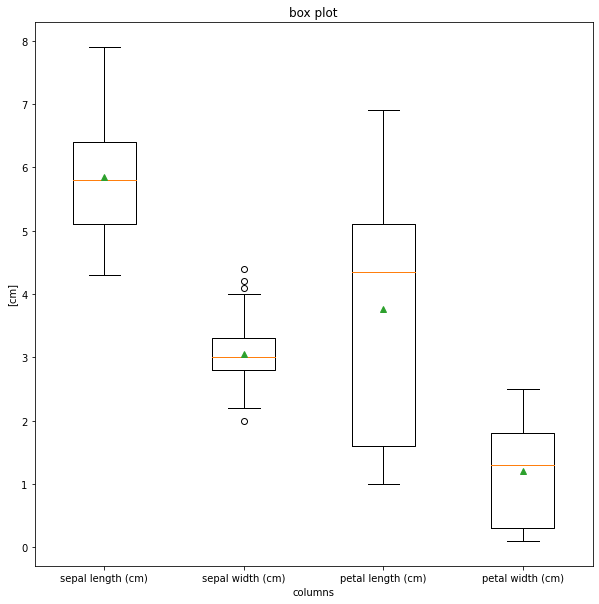

In [35]:
fig, ax = plt.subplots(figsize=(10,10)) # 大きさ変更
ax.boxplot([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]], showmeans=True) # 各ラベルの内容を箱髭図で表示
ax.set_xticklabels(df.columns.values[0:4]) # 列名を取得
ax.set_xlabel('columns')
ax.set_ylabel('[cm]');
ax.set_title('box plot');

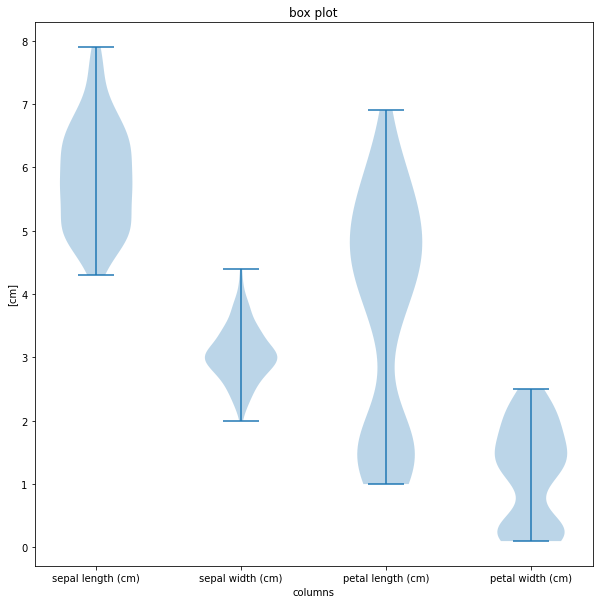

In [36]:
data = [df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]]
fig, ax = plt.subplots(figsize=(10,10));
ax.violinplot(data)
ax.set_title('box plot')
ax.set_xlabel('columns')
ax.set_xticks([1, 2, 3, 4]) # メモリの指定
ax.set_xticklabels(df.columns.values[0:4]) # メモリに名前をつける
ax.set_ylabel('[cm]');

箱ひげ図は第1四分因数、第2四分引数、第3四分因数及び中央値を表示するため、客観的にグラフの概要をつかめる  
ヴァイオリン図の場合分布図で表示されるため、概要を掴みやすい

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

In [37]:
df_1 = df.query('`Species` == 0')
df_2 = df.query('`Species` == 1')
df_3 = df.query('`Species` == 2')

### ４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。
以下の図はそのうち一つの例です。

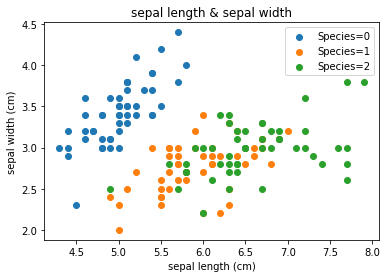

In [38]:
plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 1],label='Species=0')
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1],label='Species=1')
plt.scatter(df_3.iloc[:, 0], df_3.iloc[:, 1],label='Species=2')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('sepal length & sepal width')
plt.legend();

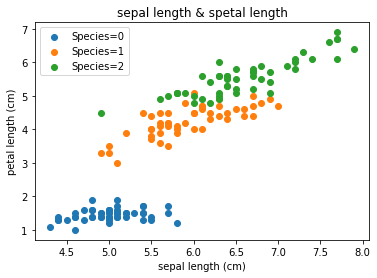

In [39]:
plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 2],label='Species=0')
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 2],label='Species=1')
plt.scatter(df_3.iloc[:, 0], df_3.iloc[:, 2],label='Species=2')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('sepal length & spetal length')
plt.legend();

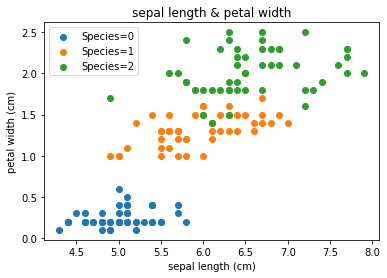

In [40]:
plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 3],label='Species=0')
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 3],label='Species=1')
plt.scatter(df_3.iloc[:, 0], df_3.iloc[:, 3],label='Species=2')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('sepal length & petal width')
plt.legend();

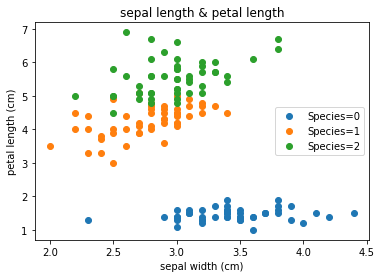

In [41]:
plt.scatter(df_1.iloc[:, 1], df_1.iloc[:, 2],label='Species=0')
plt.scatter(df_2.iloc[:, 1], df_2.iloc[:, 2],label='Species=1')
plt.scatter(df_3.iloc[:, 1], df_3.iloc[:, 2],label='Species=2')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.title('sepal length & petal length')
plt.legend();

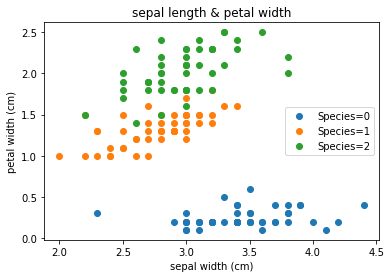

In [42]:
plt.scatter(df_1.iloc[:, 1], df_1.iloc[:, 3],label='Species=0')
plt.scatter(df_2.iloc[:, 1], df_2.iloc[:, 3],label='Species=1')
plt.scatter(df_3.iloc[:, 1], df_3.iloc[:, 3],label='Species=2')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.title('sepal length & petal width')
plt.legend();

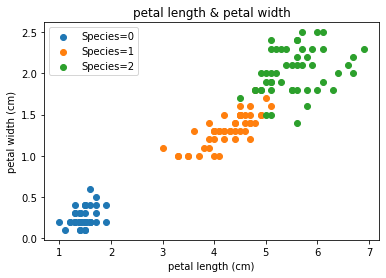

In [43]:
plt.scatter(df_1.iloc[:, 2], df_1.iloc[:, 3],label='Species=0')
plt.scatter(df_2.iloc[:, 2], df_2.iloc[:, 3],label='Species=1')
plt.scatter(df_3.iloc[:, 2], df_3.iloc[:, 3],label='Species=2')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('petal length & petal width')
plt.legend();

### すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。

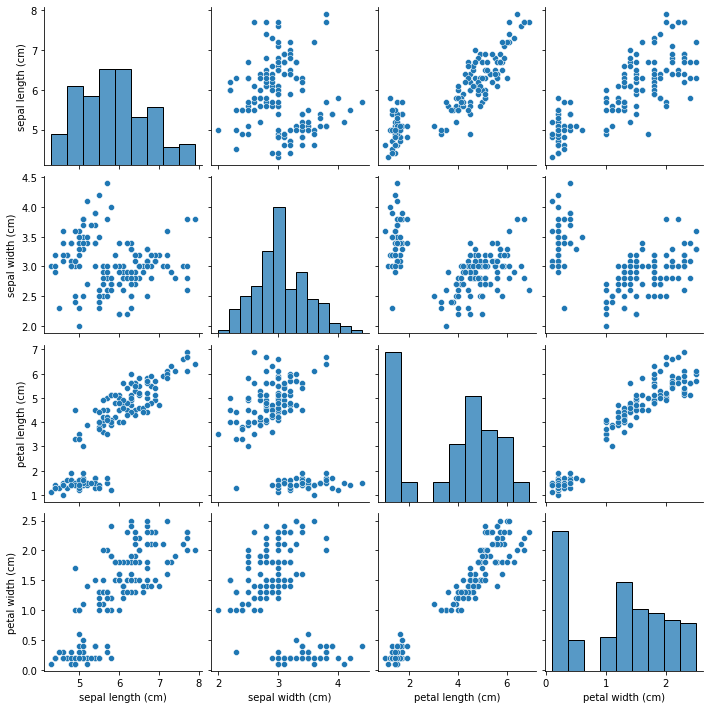

In [44]:
import seaborn as sns
sns.pairplot(df.iloc[:, 0:4]); # 4列目までで散布図行列を作成４つの特徴量に関する相関係数行列を作る

４つの特徴量に関する相関係数行列を作る

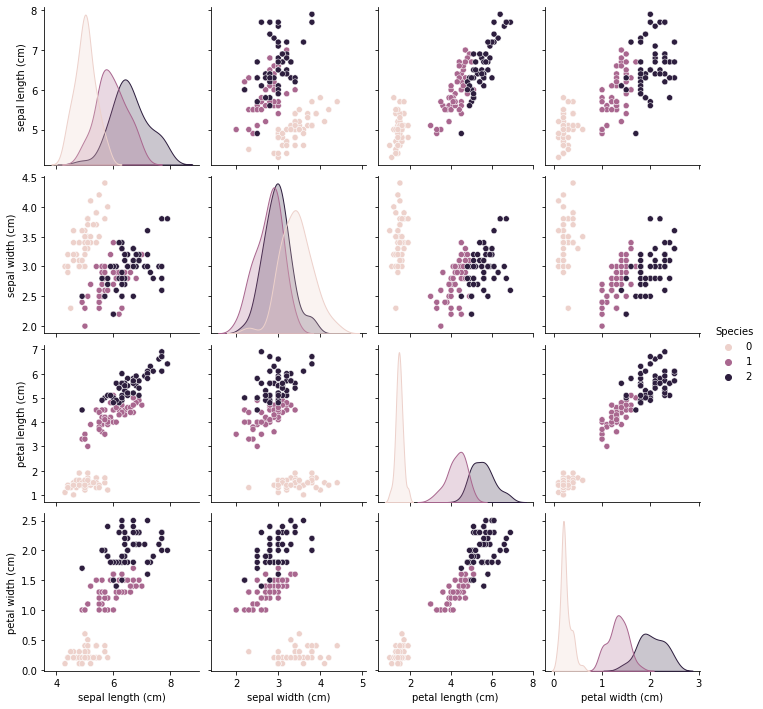

In [45]:
pg = sns.pairplot(df.iloc[:, 0:5], hue='Species') 

### ４つの特徴量に関する相関係数行列を作る

In [46]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


### 相関係数行列のヒートマップを作る(１つ)

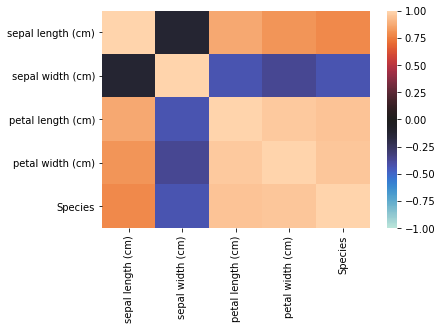

In [47]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0);

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

- 散布図行列より、 アヤメの種類による各特徴量の大きさは以下の通り

    sepal length : Iris-Setosa < Iris-Versicolour < Iris-Virginica
    sepal width : Iris-Versicolour,Iris-Virginica < Iris-Setosa
    petal length : Iris-Setosa < Iris-Versicolour < Iris-Virginica
    petal width : Iris-Setosa < Iris-Versicolour < Iris-Virginica

    sepal width以外の特徴量は差がかなり激しいため、分類はしやすい

- また、相関係数行列よりpetal length,petal widthとアヤメの種類との相関が0.95に近くかなり相関が見られる。また、上記特徴量の相関も0.96と高い。


上記二点よりpetal length,petal widthのどちらかの特徴量があれば、かなりの精度でアヤメの分類は可能であると考えられる。